In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Activate Seaborn default theme
sns.set()

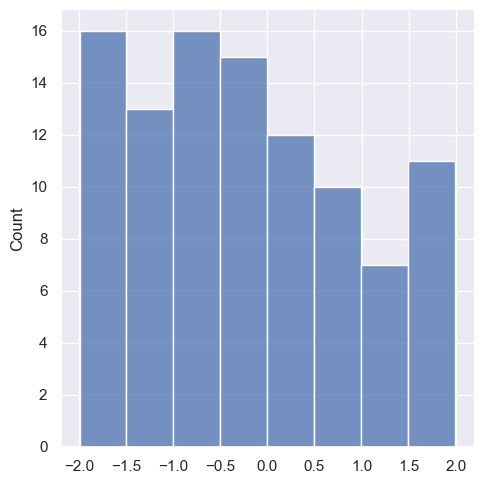

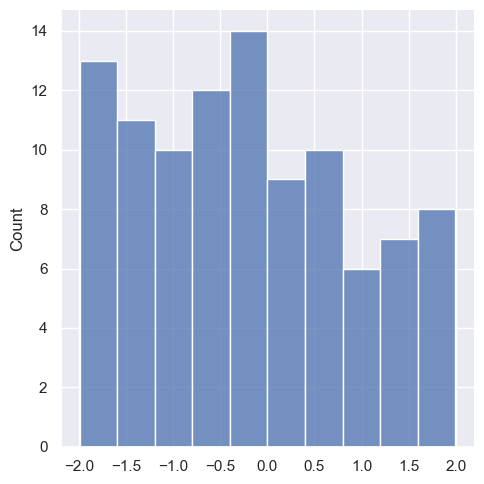

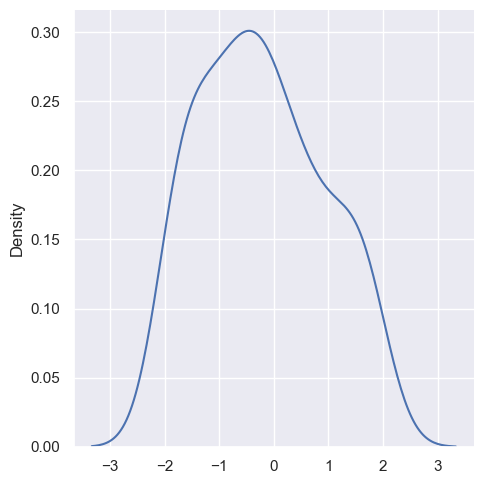

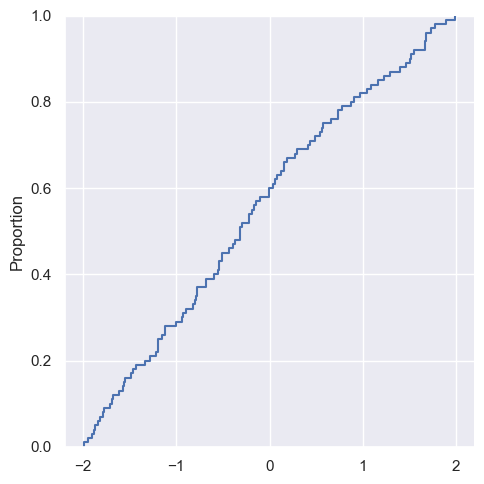

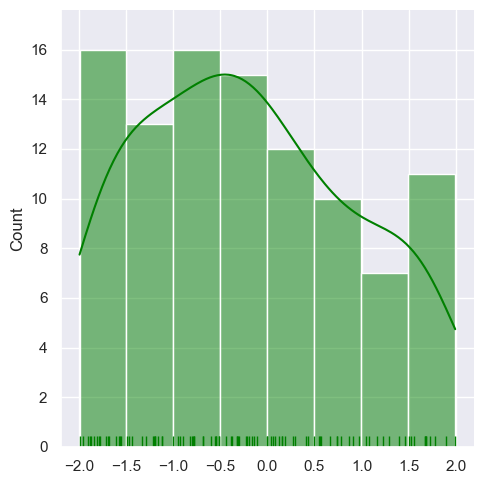

In [14]:
# Continuous Variable
np.random.seed(15)

x = np.random.uniform(-2, 2, 100)

sns.displot(x);
# Bu default a histogram of the data is displayed. 
# bins = 10 can be added to select the number of bins. 
# Wie können wir den Graphen labeln wenn kein df?
sns.displot(x, bins = 10)

# Wir m.H. von kind können wir wählen zuwischen hist, kde, ecdf
sns.displot(x, kind = 'kde')

# Wir m.H. von kind können wir wählen zuwischen hist, kde, ecdf
# ECDF - Empirical cumulative distribution function 

# It is a step function that gives you cdf of the values
# Pros: directly measure each value. No parameters to adjust
# Cons: Median etc not observed well
sns.displot(x, kind = 'ecdf')

# Wir m.H. von kind können wir wählen zuwischen hist, kde, ecdf
# rug sets little thingys to the axis
sns.displot(x, kde = True, rug = True, color = 'green');



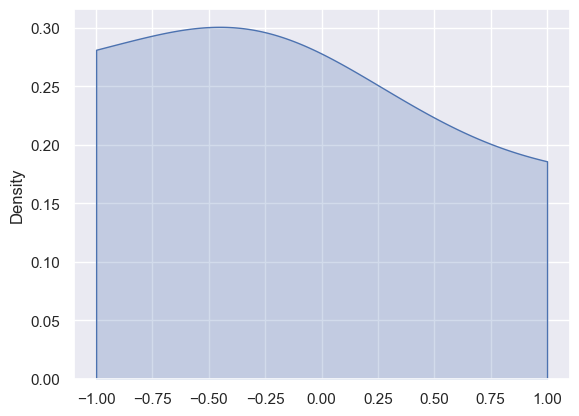

In [15]:
# If we only care about the kde and wanna customize it more we use 
# known parameters are shade, cut, and clip. Where cut cuts off the extreme values und clip lets you cut off manually. 
sns.kdeplot(x, shade = True, clip = (-1, 1));

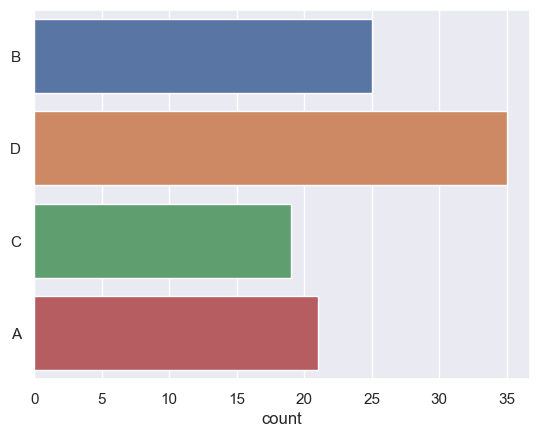

In [17]:
# Discrete Variable

# We use barplot which is countplot in seaborn
np.random.seed(15)

x = np.random.choice(['A', 'B', 'C', 'D'], size = 100)

# Put only x for horizontal
sns.countplot(y = x);

# Using hue you can make x depend on hue. 

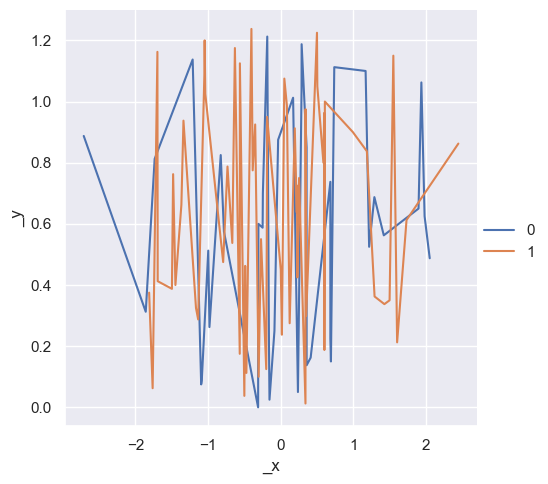

In [14]:
""" Multivariate Statistical Analysis 1 (?) - Relationship between quantitative variables
# Working with relplot
# kind: Default: scatter, also possible line
    # by default line also displayes the confidence interval of a value x if it appears more than once turn off with ci=None
# x, y, hue (for color), size, style 
# Using col and row can make a plot for each discrete variable
"""
np.random.seed(15)

x_co = np.random.normal(0, 1, 100)
y_co = np.array(np.arange(100)) / 80
col_co = np.random.choice(['A', 'B', 'C', 'D'], 100)
hue_co = np.random.choice(['0', '1'], 100)

# Why does col not work?
sns.relplot(x = x_co, y = y_co, hue = hue_co,  col = col_co, kind = 'line');

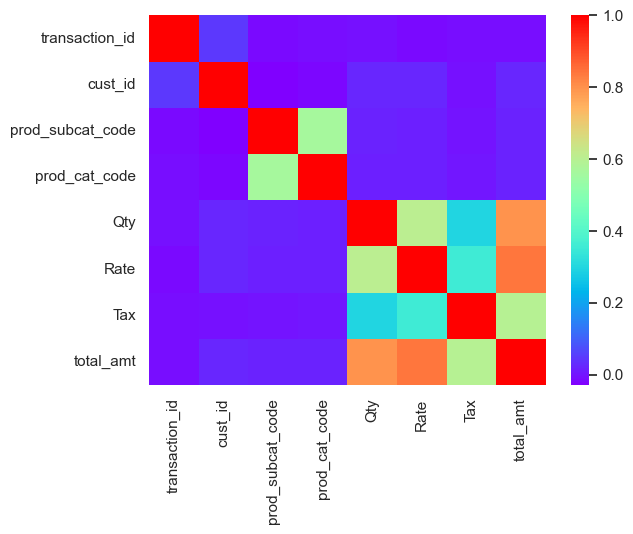

In [41]:
""" Multivariate Statistical Analysis 2 (?) - Relationship between quantitative variables 2
# Working with lmplot, pairplot and heatmap
# lmplot plots the datapoints in a scatterplot and gives a regression line. 
    # With order = 2 we get a parabular regression line
    # With lowess = True we get a local estimate of the regression line (What is that?)
# pairplot has as argument a dataframe ant it plots the different quantitative variables against each other with the distribution on the x-axis
    #diag_kind hist for histogram, kde for distribution
# heatmap takes a matrix as input. cmap lets you decide the colors. also annot = True gives numbers

also note about Figure and Axis Objects from plt.subplots. Aber das geht bei mir nicht.
"""
# Warum ist die Corrolation von Variablen mit sich selbst 1?

# Geht das nur mir einem DataFrame?
tran = pd.read_csv('transactions.csv')

#sns.relplot(x = 'Rate', y = 'Tax' , data = tran);

# sns.pairplot(tran.iloc[:, 6:8]);

sns.heatmap(tran.corr(), cmap = 'rainbow');

In [42]:
""" Multivariate analysis with qualitative variable(s) 
To analyse the interaction of qualitative and quantitative variables we use catplot()
kind = 'hist' | 'swarm' | 'violin' | 'box' | 'boxen'

IF violin :
    split : bool -> splits the violin along a binary feature
    inner : None -> removes the things inside

    
We can superimpose to graphs by catching the return argument of a sns method and use it as the position for the next one.
Seems like we have to use differnet plots though:
p = sns.catplot(kind = 'violin')
sns.swarmplot(ax = p)
Error if also catplot(kind = 'warm')

"""


" Multivariate analysis with qualitative variable(s) \nTo analyse the interaction of qualitative and quantitative variables we use catplot()\nkind = 'hist' | 'swarm' | 'violin' | 'box' | 'boxen'\n\nIF violin :\n    split : bool -> splits the violin along a binary feature\n    inner : None -> removes the things inside\n\n    \nWe can superimpose to graphs by catching the return argument of a sns method and use it as the position for the next one.\nSeems like we have to use differnet plots though:\np = sns.catplot(kind = 'violin')\nsns.swarmplot(ax = p)\nError if also catplot(kind = 'warm')\n\n"

In [ ]:
""" Multiple Graphs """


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('transactions.csv')
df.head()
#pd.DataFrame(df.groupby('').size())

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014               1.0              1   -5   
1     29258453508   270384  27-02-2014               5.0              3   -5   
2     51750724947   273420  24-02-2014               6.0              5   -2   
3     93274880719   271509  24-02-2014              11.0              6   -3   
4     51750724947   273420  23-02-2014               6.0              5   -2   

     Rate      Tax  total_amt Store_type  
0  -772.0  405.300  -4265.300     e-Shop  
1 -1497.0  785.925  -8270.925     e-Shop  
2  -791.0  166.110  -1748.110   TeleShop  
3 -1363.0  429.345  -4518.345     e-Shop  
4  -791.0  166.110  -1748.110   TeleShop

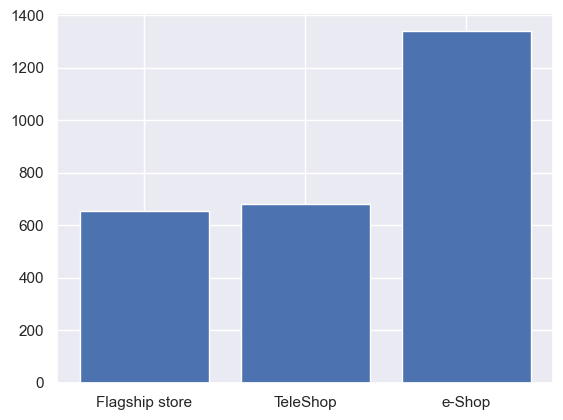

In [40]:
top2 = df.groupby('Store_type').size().sort_values().tail(3)

plt.bar(top2.index, [top2[x] for x in range(len(top2.index))]);

In [15]:
df['rand'] = np.random.choice(['A', 'B', 'C', 'A, B', 'A, C', 'A, B, C', 'B, C'], df.shape[0])

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014               1.0              1   -5   
1     29258453508   270384  27-02-2014               5.0              3   -5   
2     51750724947   273420  24-02-2014               6.0              5   -2   
3     93274880719   271509  24-02-2014              11.0              6   -3   
4     51750724947   273420  23-02-2014               6.0              5   -2   

     Rate      Tax  total_amt Store_type     rand  
0  -772.0  405.300  -4265.300     e-Shop        A  
1 -1497.0  785.925  -8270.925     e-Shop        C  
2  -791.0  166.110  -1748.110   TeleShop  A, B, C  
3 -1363.0  429.345  -4518.345     e-Shop  A, B, C  
4  -791.0  166.110  -1748.110   TeleShop        B

In [23]:
df['help'] = df.rand.apply(lambda x : 'A' in x.split(', '))

uk = df.loc[(df.Store_type == 'e-Shop') & (df.help == True)]

uk.sort_values('cust_id')

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
1149     33368801444   266805  27-12-2013               8.0              3   
1764     71028241442   266806  28-11-2013               4.0              1   
2278     37520493338   266820   1-11-2013               4.0              1   
665      26523682313   266841  18-01-2014               3.0              5   
2197     80422064589   266846   6-11-2013               4.0              3   
...              ...      ...         ...               ...            ...   
2628     51997466118   275230  16-10-2013               8.0              3   
1378     43821626254   275231  17-12-2013               3.0              2   
507      99264354202   275246  26-01-2014               4.0              3   
2015      7046193868   275252  14-11-2013               7.0              5   
2887     19723849126   275255   4-10-2013               8.0              3   

      Qty    Rate      Tax  total_amt Store_type     rand  help  
1149    4  1046.0  439.320   4623.320     e-Shop     A, C  True  
1764    4   209.0   87.780    923.780     e-Shop        A  True  
2278    4   480.0  201.600   2121.600     e-Shop        A  True  
665     3   799.0  251.685   2648.685     e-Shop  A, B, C  True  
2197    5  1161.0  609.525   6414.525     e-Shop        A  True  
...   ...     ...      ...        ...        ...      ...   ...  
2628    1  1085.0  113.925   1198.925     e-Shop     A, B  True  
1378    1   719.0   75.495    794.495     e-Shop        A  True  
507     4   191.0   80.220    844.220     e-Shop  A, B, C  True  
2015    1   652.0   68.460    720.460     e-Shop     A, C  True  
2887    3  1309.0  412.335   4339.335     e-Shop     A, B  True  

[734 rows x 12 columns]